수치예측을 위한 모델들에 대해서 알아보겠습니다. 수치예측을 위한 데이터셋 생성을 해보고, 선형회귀를 위한 가장 간단한 퍼셉트론 모델부터 깊은 다층퍼셉트론 모델까지 구성 및 학습을 시켜보겠습니다

---
### 데이터셋 준비

입력 x에 대해 2를 곱해 두 배 정도 값을 갖는 출력 y가 되도록 데이터셋을 생성해봤습니다. 선형회귀 모델을 사용한다면 Y = w * X + b 일 때, w가 2에 가깝고, b가 0에 가깝게 되도록 학습시키는 것이 목표입니다.

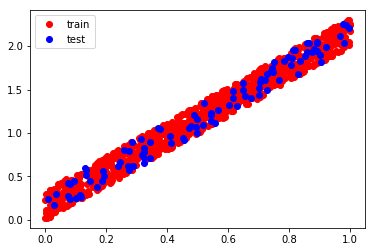

In [105]:
import numpy as np

# 데이터셋 생성
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 데이터셋 확인
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_train, y_train, 'ro')
plt.plot(x_test, y_test, 'bo')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_5.png)

---
### 레이어 준비

수치예측 모델에 사용할 레이어는 `Dense`와 `Activation`입니다. `Activation`에는 은닉층(hidden layer)에 사용할 `relu`를 준비했습니다. 데이터셋은 일차원 벡터만 다루도록 하겠습니다.

|종류|구분|상세구분|브릭|
|:-:|:-:|:-:|:-:|
|데이터셋|Vector|-|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Dataset_Vector_s.png)|
|레이어|Dense||![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Dense_s.png)|
|레이어|Activation|relu|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Activation_Relu_s.png)|

---
### 모델 준비

수치예측을 하기 위해 `퍼셉트론 모델`, `다층퍼셉트론 모델`, `깊은 다층퍼셉트론 모델`을 준비했습니다.

#### 퍼셉트론 모델

Dense 레이어가 하나이고, 뉴런의 수도 하나인 가장 기본적인 퍼셉트론 모델입니다. 즉 웨이트(w) 하나, 바이어스(b) 하나로 전형적인 y = wx + b를 풀기 위한 모델입니다. 수치 예측을 하기 위해서 출력 레이어에 별도의 활성화 함수를 사용하지 않았습니다. w, b 값이 손으로 푼 선형회귀 최적해에 근접하려면 경우에 따라 만번이상의 에포크가 필요합니다. 실제로 사용하지는 않는 모델이지만 선형회귀부터 공부하시는 분들에게는 입문 모델로 나쁘지 않습니다.

[케라스 코드]

    model = Sequential()
    model.add(Dense(1, input_dim=1))
        
![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_1.png)

#### 다층퍼셉트론 모델

Dense 레이어가 두 개인 다층퍼셉트론 모델입니다. 첫 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 `relu` 활성화 함수를 사용하였습니다. 출력 레이어인 두 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않았습니다.

[케라스 코드]

    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(1))

![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_2.png)

#### 깊은 다층퍼셉트론 모델

Dense 레이어가 총 세 개인 다층퍼셉트론 모델입니다. 첫 번째, 두 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 `relu` 활성화 함수를 사용하였습니다. 출력 레이어인 세 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않았습니다.

[케라스 코드]

    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    
![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_3.png)    

#### 퍼셉트론 모델 전체 소스

Epoch 1/50
1000/1000 [==============================] - 2s - loss: 1.2526      
Epoch 2/50
1000/1000 [==============================] - 0s - loss: 1.1919     
Epoch 3/50
1000/1000 [==============================] - 0s - loss: 1.1407     
Epoch 4/50
1000/1000 [==============================] - 0s - loss: 1.0917     
Epoch 5/50
1000/1000 [==============================] - 0s - loss: 1.0440     
Epoch 6/50
1000/1000 [==============================] - 0s - loss: 0.9976     
Epoch 7/50
1000/1000 [==============================] - 0s - loss: 0.9528     
Epoch 8/50
1000/1000 [==============================] - 0s - loss: 0.9088     
Epoch 9/50
1000/1000 [==============================] - 0s - loss: 0.8658     
Epoch 10/50
1000/1000 [==============================] - 0s - loss: 0.8242     
Epoch 11/50
1000/1000 [==============================] - 0s - loss: 0.7835     
Epoch 12/50
1000/1000 [==============================] - 0s - loss: 0.7446     
Epoch 13/50
1000/1000 [=========================

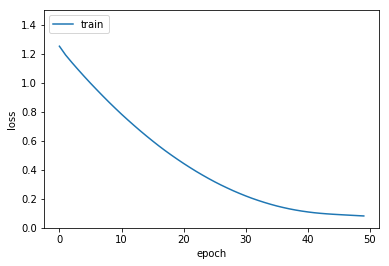

In [98]:
# 퍼셉트론 모델로 수치예측하기

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(1, input_dim=1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

# 5. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### 다층퍼셉트론 모델 전체 소스

Epoch 1/50
1000/1000 [==============================] - 2s - loss: 0.9789      
Epoch 2/50
1000/1000 [==============================] - 0s - loss: 0.6524     
Epoch 3/50
1000/1000 [==============================] - 0s - loss: 0.4222     
Epoch 4/50
1000/1000 [==============================] - 0s - loss: 0.2468     
Epoch 5/50
1000/1000 [==============================] - 0s - loss: 0.1298     
Epoch 6/50
1000/1000 [==============================] - 0s - loss: 0.0692     
Epoch 7/50
1000/1000 [==============================] - 0s - loss: 0.0481     
Epoch 8/50
1000/1000 [==============================] - 0s - loss: 0.0376     
Epoch 9/50
1000/1000 [==============================] - 0s - loss: 0.0274     
Epoch 10/50
1000/1000 [==============================] - 0s - loss: 0.0193     
Epoch 11/50
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 12/50
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 13/50
1000/1000 [=========================

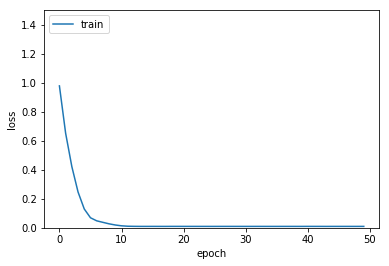

In [103]:
# 다층퍼셉트론 모델로 수치예측하기

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

# 5. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### 깊은 다층퍼셉트론 모델 전체 소스

Epoch 1/50
1000/1000 [==============================] - 2s - loss: 1.0374     
Epoch 2/50
1000/1000 [==============================] - 0s - loss: 0.3070     
Epoch 3/50
1000/1000 [==============================] - 0s - loss: 0.0581     
Epoch 4/50
1000/1000 [==============================] - 0s - loss: 0.0310     
Epoch 5/50
1000/1000 [==============================] - 0s - loss: 0.0199     
Epoch 6/50
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 7/50
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 8/50
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 9/50
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 10/50
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 11/50
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 12/50
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 13/50
1000/1000 [==========================

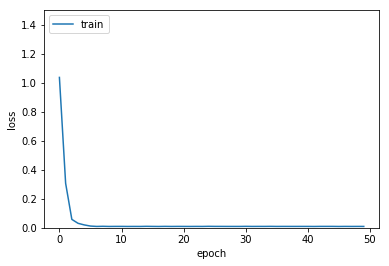

In [104]:
# 깊은 다층퍼셉트론 모델로 수치예측하기

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

# 5. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

---

### 학습결과 비교

퍼셉트론 > 다층퍼셉트론 > 깊은 다층퍼셉트론 순으로 학습이 좀 더 빨리 되는 것을 확인할 수 있습니다.

|퍼셉트론|다층퍼셉트론|깊은 다층퍼셉트론|
|:-:|:-:|:-:|
|![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_6.png)|![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_7.png)|![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_8.png)|

---

### 결론

수치예측을 위한 퍼셉트론, 다층퍼셉트론, 깊은 다층퍼셉트론 모델을 살펴보고, 그 성능을 확인 해봤습니다.

![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_4.png)

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/lecture/)